### In this notebook I will cluster data without adding any numerical vaalues to it

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\HIM\Desktop\golu\Dataset.csv")

In [3]:
data = data.drop(["business_id","smoking","BusinessParking"],axis=1)


In [4]:
drop = list()
for c in data.drop(["pricelevel","review_count","stars","average_hours"],axis=1).columns:
    if data[c].value_counts()[1] < 15:
        drop.append(c)

d = {
    "Amenties": "",
    "Food":""
}
new  = pd.DataFrame(d,index=range(len(data)))

food = ['Salvadoran', 'Arabian', 'Argentine', 'Belgian','Teppanyaki', 'Dim Sum', 'French', 'Filipino', 'Canadian','Ice Cream','Italian',
 'Mediterranean', 'Moroccan', 'Desserts', 'Nepalese','Polish', 'Tex-Mex','Caribbean','Hawaiian','Thai','European','Cuban','Soups','Cantonese',
 'Burgers', 'Steakhouse', 'African', 'Kebab', 'Greek', 'Asian Fusion', 'Ethiopian', 'Turkish', 'Middle Eastern', 'Lounge', 'Indian',
 'Latin American', 'Brazilian','Korean', 'Barbeque', 'Russian', 'Afghan', 'Malaysian', 'Kosher', 'American', 'Irish', 'Chinese',
 'German', 'Taiwanese', 'Persian', 'Mongolian', 'Vietnamese', 'Donuts', 'Scottish', 'Waffles', 'Fast Food', 'Venezuelan', 'Pizza', 'Deli', 'Lebanese',
 'Diner', 'Seafood', 'British', 'Portuguese', 'Columbian', 'Mexican', 'Peruvian', 'Japanese', 'Cambodian', 'Hot Dogs','Spanish']

Amenties = list()
for i  in data.drop(drop,axis=1).columns:
    if i not in food:
        if data[i].nunique()<3: ##Only to get Categorial Variables
            Amenties.append(i)

for i in food:
    new["Food"] = data[i].astype('int64').astype(str) + new["Food"] ## Firstly  it is converted to int bcs our values is in format
                                                                    ##0.0 which cannot be converted into binary.
for i in Amenties:
    new["Amenties"] = data[i].astype('int64').astype(str) + new["Amenties"]
    
for i in range(len(new)):
    new["Amenties"][i] =int(new["Amenties"][i],2)
    new["Food"][i] = int(new["Food"][i],2)

In [5]:
standard = pd.read_csv("standard.csv")

In [15]:
from __future__ import print_function
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
def silhoute(sample , n):
    range_n_clusters = n
    X =sample.values

    for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 9)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
            ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
        colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
        centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

        plt.show()

In [7]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"
import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
def plot(x,y,z,color):
    trace1 = go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
        size=10,
        color=color,     # set color to an array/list of desired values
        colorscale=[[0, 'rgb(166,2,227)'], [0.25, 'rgb(31,120,180)'], [0.45, 'rgb(178,223,138)'], [0.65, 'rgb(51,160,44)'], [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],   # choose a colorscale
        opacity=0.8
    )
    )

    data = [trace1]
    layout = go.Layout(
         width=1000,
        height=800,
        margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
        )
        )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='3d-scatter-colorscale')

In [8]:
from sklearn.cluster import KMeans
def kme(sample,n):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(sample)
    return kmeans.labels_

In [19]:
sample  =new.sample(frac=.30,random_state=2)

For n_clusters = 6 The average silhouette_score is : 0.987150459835


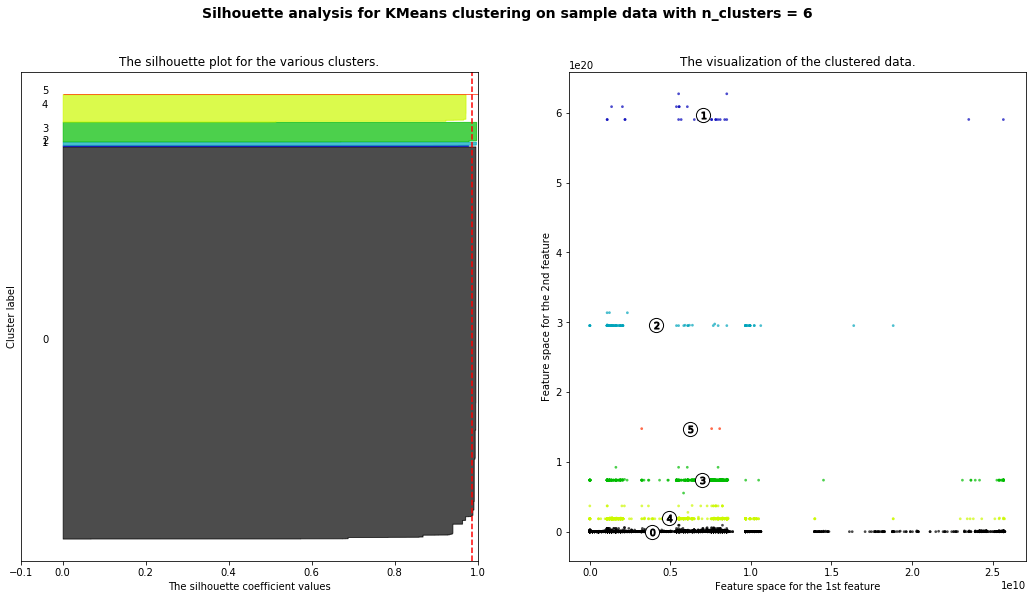

For n_clusters = 7 The average silhouette_score is : 0.988929659874


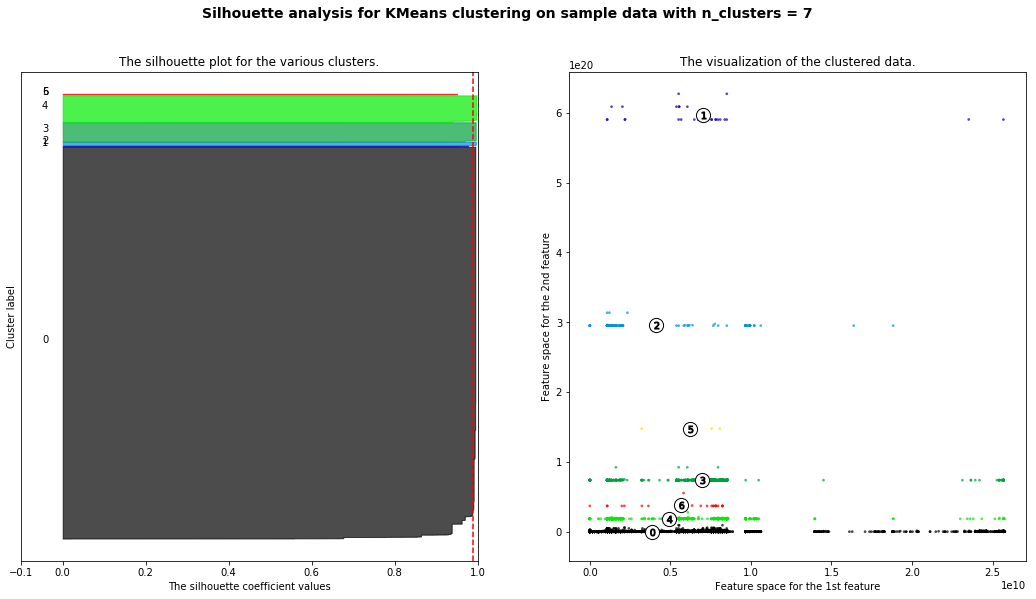

For n_clusters = 8 The average silhouette_score is : 0.988806012727


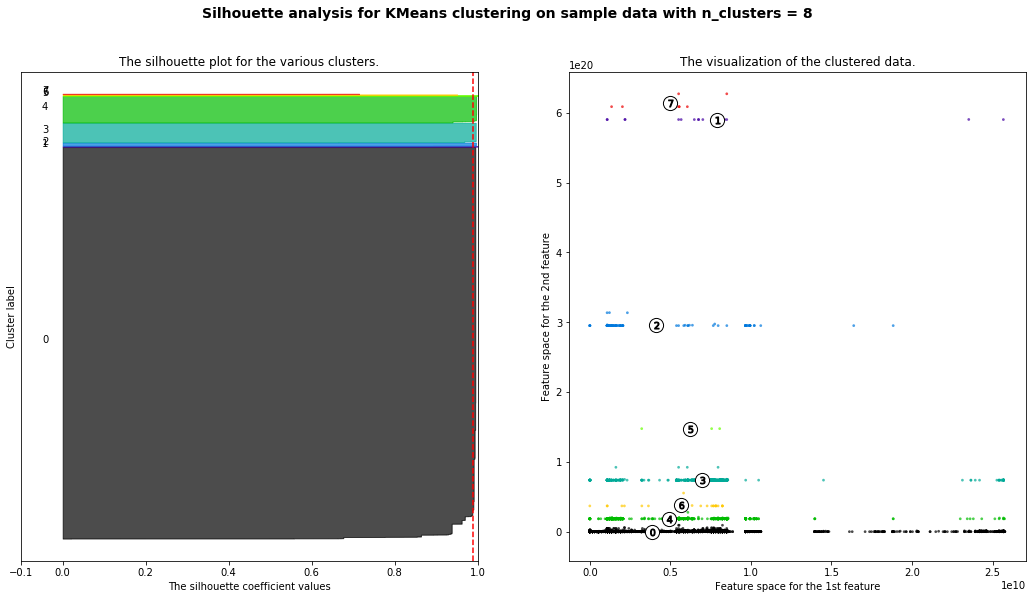

For n_clusters = 9 The average silhouette_score is : 0.988933062972


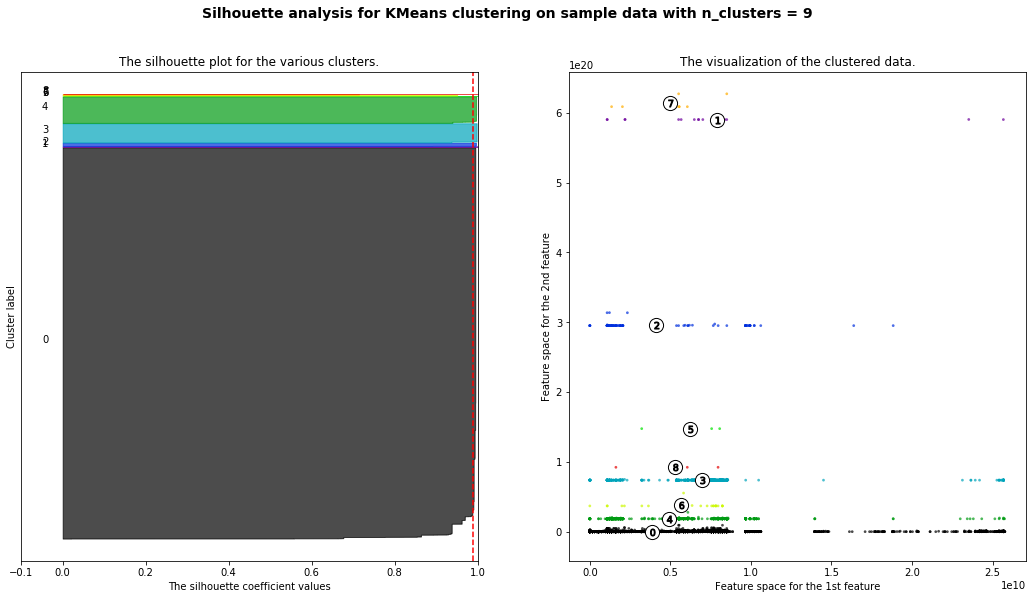

For n_clusters = 10 The average silhouette_score is : 0.956631093852


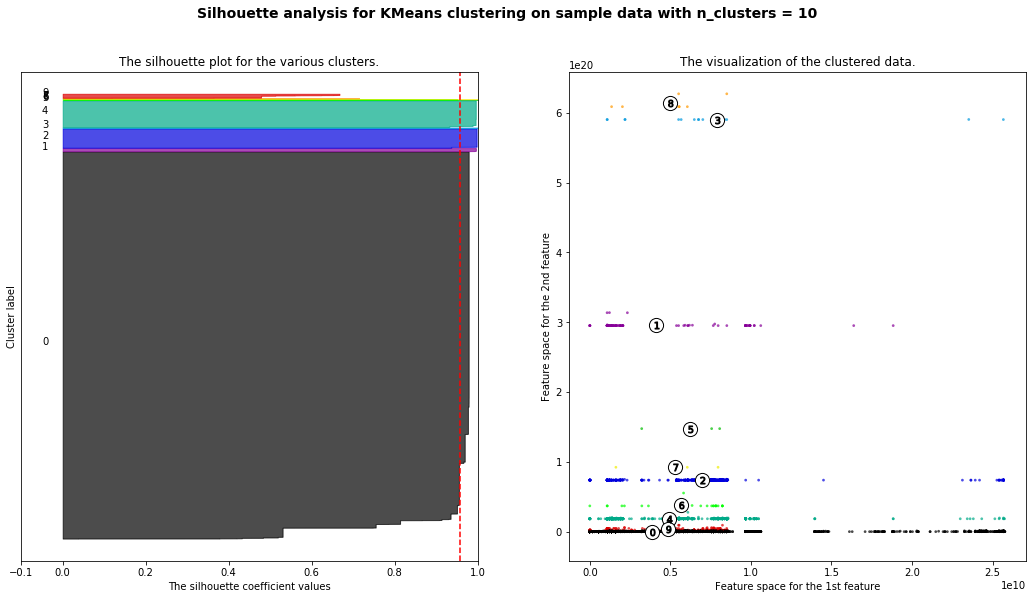

In [21]:
silhoute(sample,[6,7,8,9,10])

In [22]:
label = kme(sample,9)
plot(sample.Amenties,sample.Food,sample.index,label)

### For standard dataset

In [23]:
sample  =standard.sample(frac=.30,random_state=2)

For n_clusters = 6 The average silhouette_score is : 0.765131173962


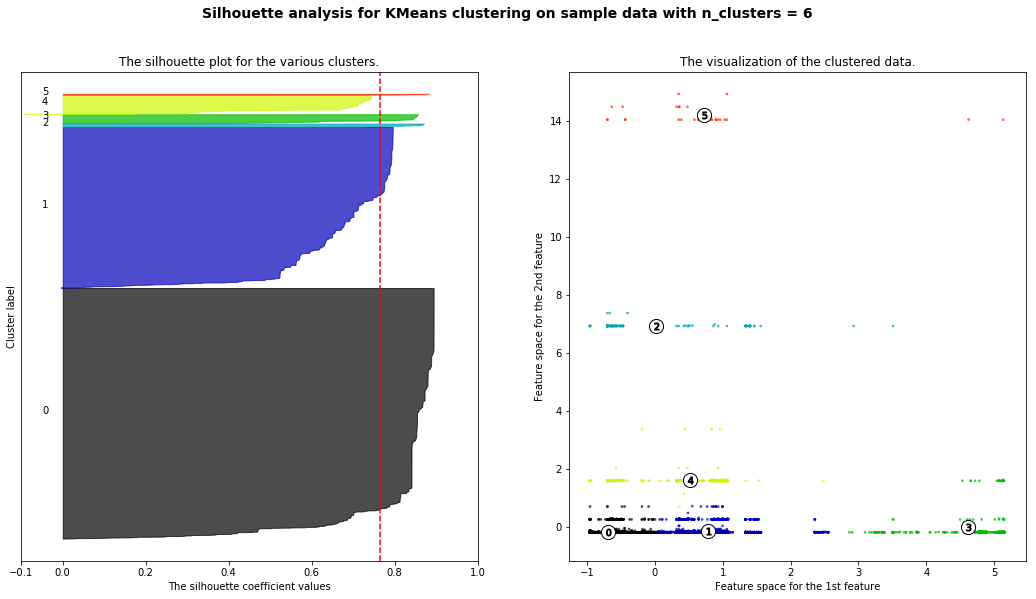

For n_clusters = 7 The average silhouette_score is : 0.708604003315


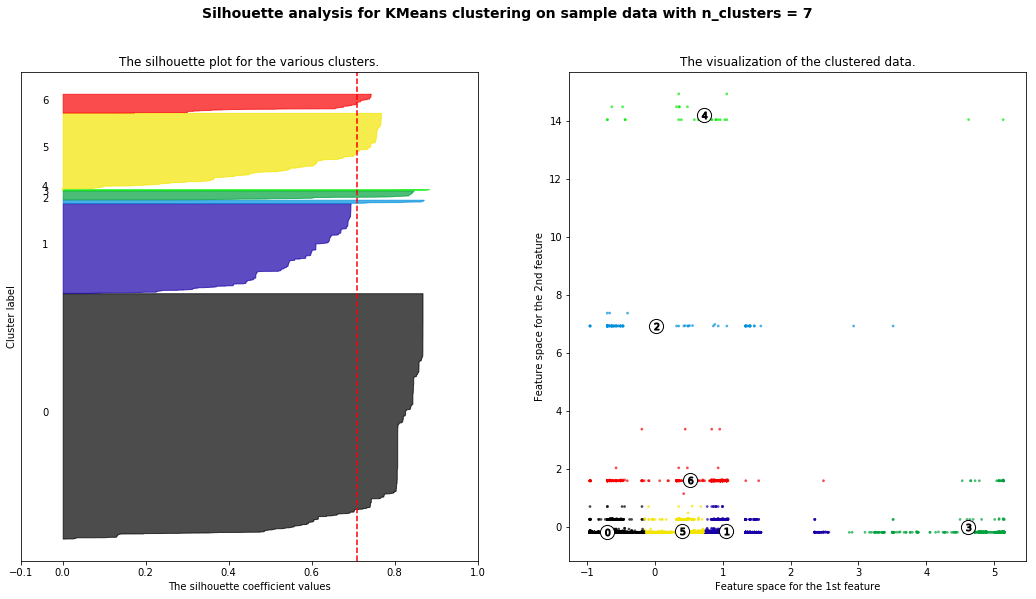

For n_clusters = 8 The average silhouette_score is : 0.715891976071


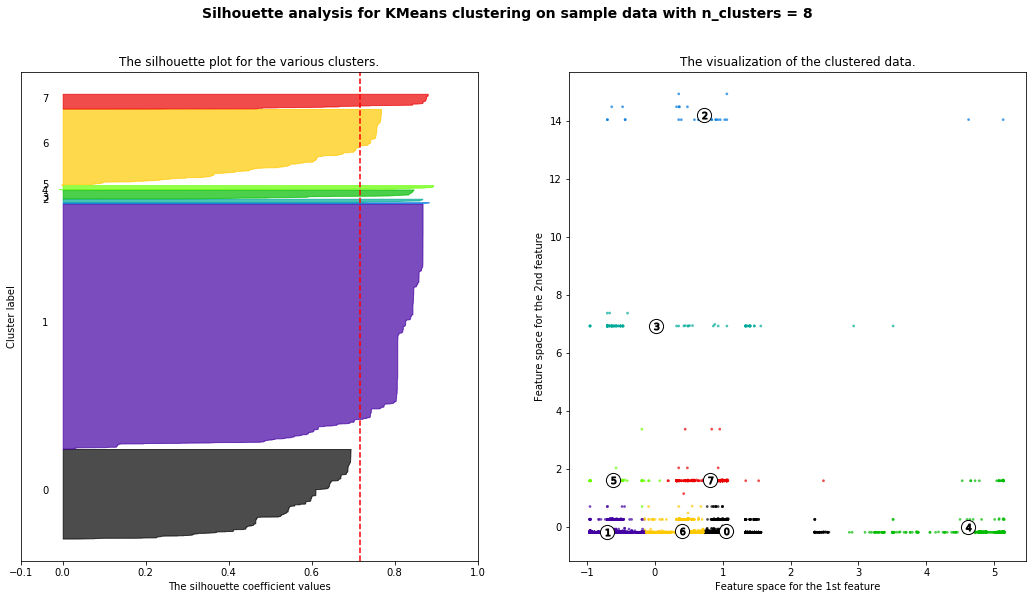

For n_clusters = 9 The average silhouette_score is : 0.601335317809


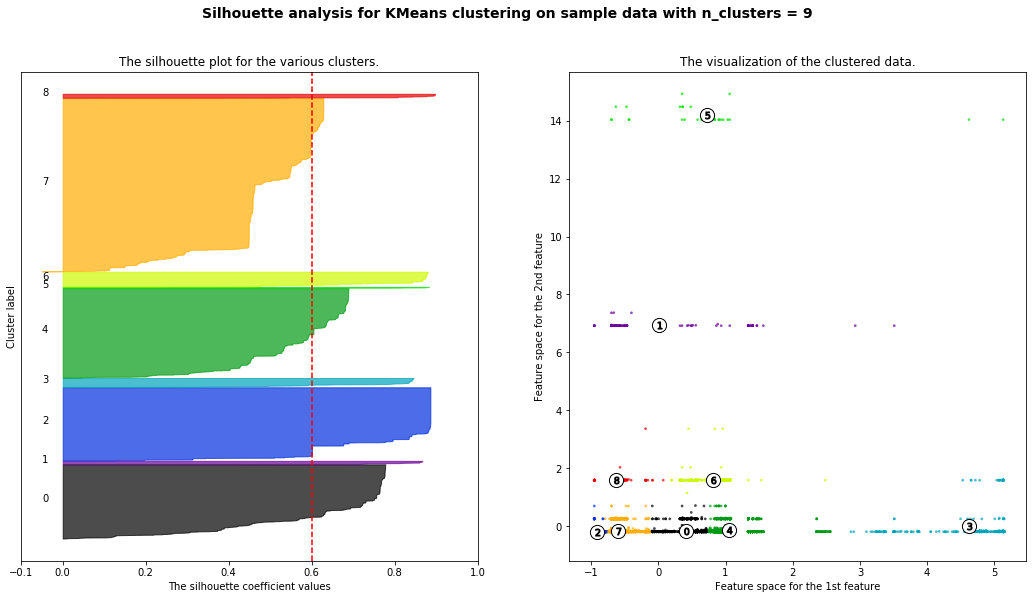

For n_clusters = 10 The average silhouette_score is : 0.604806516126


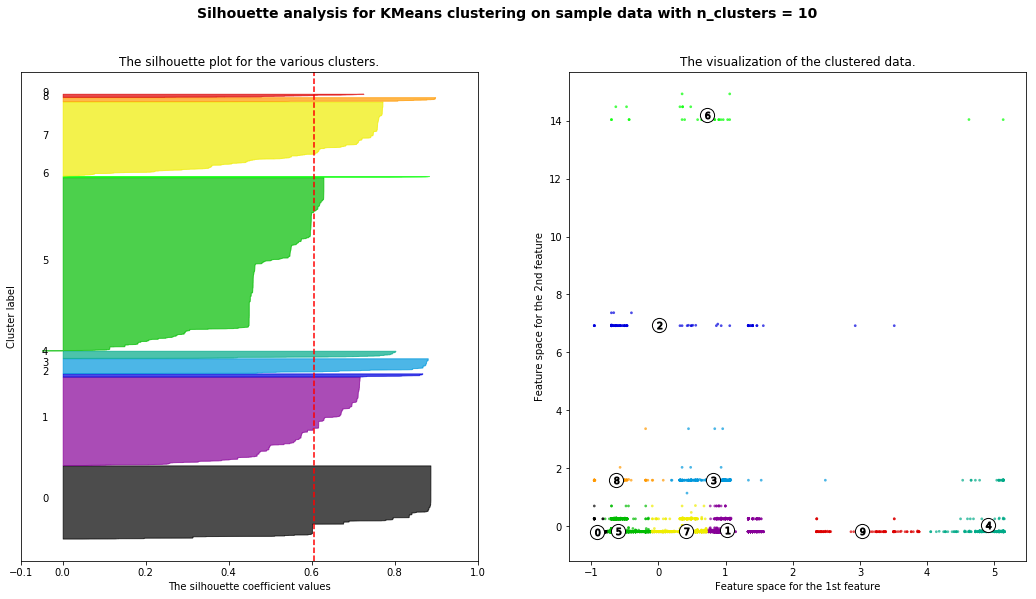

In [24]:
silhoute(sample,[6,7,8,9,10])

In [26]:
label = kme(sample,6)
plot(sample.Amenties,sample.Food,sample.index,label)

### Clusters forms are different for both datasets may be it is due to distance between values.

### Thank-you Sir giving me chance for this internship. It really help me learn some new concepts about unsupervised learning. I tried using subspace clustering but did not found Pmafia for python. Then searched for dimension reducton methods but PCA cannot be used with categorical value and could not undestand concept of MCA  So, I thought of creating binary values. 
### Sir, If it is possible please share your solution irrespective of my selection for internship.

## Thank-You